---
# Assignment 4: Introduction to Image processing
---

## Student Information
```text

Name: Ahmed Monir Almassri --- Student ID: 120220138  --- Date: 1/15/2026  

## Import Required Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

## Q1: Image Translation
Load an flower image. Apply a translation of `(tx = 120, ty = 80)` using a manual transformation matrix. Display both the original and the translated images side by side.  
**Question:** What happens to pixels that move outside the image boundaries? How does OpenCV handle them?

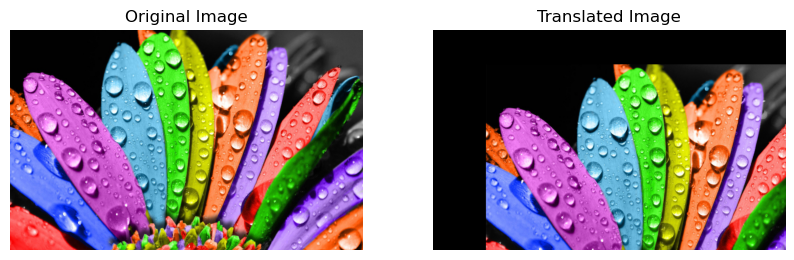

In [2]:
# Write your code here

# Load the flower image
img = cv2.imread('flower.jpg')

# Convert BGR to RGB for correct display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
h, w, _ = img_rgb.shape

# Manual transformation matrix for translation
tx, ty = 120, 80
T = np.float32([
    [1, 0, tx],
    [0, 1, ty]
])

# Apply translation
translated_img = cv2.warpAffine(img_rgb, T, (w, h))

# Display original and translated images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Translated Image")
plt.imshow(translated_img)
plt.axis("off")

plt.show()

Applying a translation of (tx = 120, ty = 80) shifts all pixels to the right and downward.
Pixels that move outside the image boundaries are discarded.
The empty areas in the output image are filled with black pixels by default in OpenCV (BORDER_CONSTANT).
No wrapping occurs unless explicitly specified.

## Q2: Image Rotation
Rotate the same image by `45°` around its center using `cv2.getRotationMatrix2D`. Then rotate it by `-30°` with a scale of `0.8`. Display the two results.  

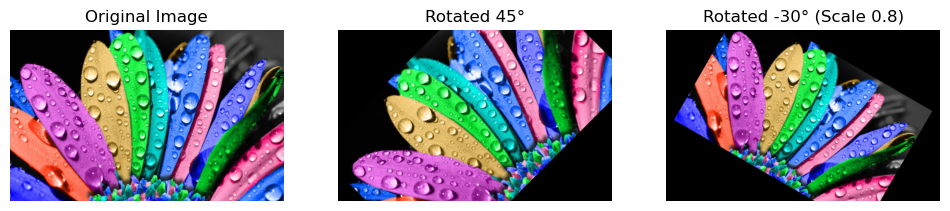

In [3]:
# Write your code here

# Get image dimensions and center
h, w, _ = img.shape
center = (w // 2, h // 2)

# Rotation 1: 45 degrees around center
M1 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(img, M1, (w, h))

# Rotation 2: -30 degrees with scale 0.8
M2 = cv2.getRotationMatrix2D(center, -30, 0.8)
rotated_minus30 = cv2.warpAffine(img, M2, (w, h))

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Rotated 45°")
plt.imshow(rotated_45)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Rotated -30° (Scale 0.8)")
plt.imshow(rotated_minus30)
plt.axis("off")

plt.show()

## Q3: Manual Mean Filter
Load `walking.jpg` in grayscale. Implement a **manual 7×7 mean filter**. Measure the execution time using `%time`. Display the filtered image.

CPU times: total: 0 ns
Wall time: 0 ns


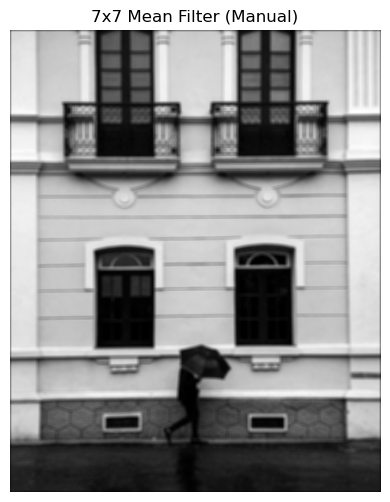

In [8]:
#Q3 Solution
# Load image in grayscale
img = cv2.imread('walking.jpg', cv2.IMREAD_GRAYSCALE)

# Get image dimensions
h, w = img.shape

# Define kernel size
k = 7
pad = k // 2

# Pad the image
padded_img = np.pad(img, pad, mode='constant', constant_values=0)

# Output image
filtered_img = np.zeros((h, w), dtype=np.uint8)

# Measure execution time
%time
for i in range(h):
    for j in range(w):
        window = padded_img[i:i+k, j:j+k]
        filtered_img[i, j] = np.mean(window)

# Display result
plt.figure(figsize=(6, 6))
plt.title("7x7 Mean Filter (Manual)")
plt.imshow(filtered_img, cmap='gray')
plt.axis("off")
plt.show()

## Q4: Filter Comparison
Apply the same 7×7 mean filter using:
1. `cv2.filter2D`
2. `scipy.signal.convolve2d`

Display all three results (manual, OpenCV, SciPy) side by side.  
**Question:** Compare the execution times and the output images. Why are there differences in the border regions?

In [1]:
# Write your code here

## Q5: Horizontal & Vertical Edge Detection
Use the provided horizontal and vertical edge detection kernels. Apply each to `walking.jpg` separately using `convolve2d`. Combine the two results by adding them. Normalize the final image to `[0, 1]` and display it.  
**Question:** What types of edges (horizontal/vertical) are most visible in the image? Why?

In [3]:
# Write your code here

<center>
    <h4>End of Assignment 4</h4>
</center>